Introduction to Pig: a Dice Game

Two players take turns rolling a die to accumulate a total score. During each turn, a player can roll the die as many times as they wish and add the result of the roll to their total score. However, if a player rolls a 1, the score they have built up during their current turn is erased and the other player begins their turn.

The idea is to build up your score during turn until you feel that a 1 will be your next roll and it is too risky to continue. At this point, you hand the die to the other player for their turn and your gains are preserved.

A player wins when they reach a total score of 100. What is the best strategy to maximize your chances of reaching 100 first?

To simplify, it will be assumed that the best strategy is the one that gives the highest average score per turn. Two potential strategies are stopping after a certain number of rolls and stopping after a certain score is reached during that turn.

The idea of Strategy 1 is that on a standard die, there is a 1/6 chance of rolling a 1. So, an intuitive strategy is to roll a certain number of times before stopping, assuming you do not roll a 1 before that number is reached. To analyze this strategy, the average score from x amount of rolls per turn will be recorded with x ranging from 1 to 20, inclusive.

The idea of Strategy 2 is that the average score in a given roll (assuming you do not roll a 1) is 4. Thus, an intuitive strategy is to keep rolling until you reach a certain score, assuming you do not roll a 1 before that score is reached. To analyze this strategy, the average score when targetting a score of x each turn will be recorded with x ranging from 1 to 50, inclusive.

In each case, 1,000,000 turns will be simulated to obtain an average score per turn for a given strategy.

Strategy 1: rolling x amount of times

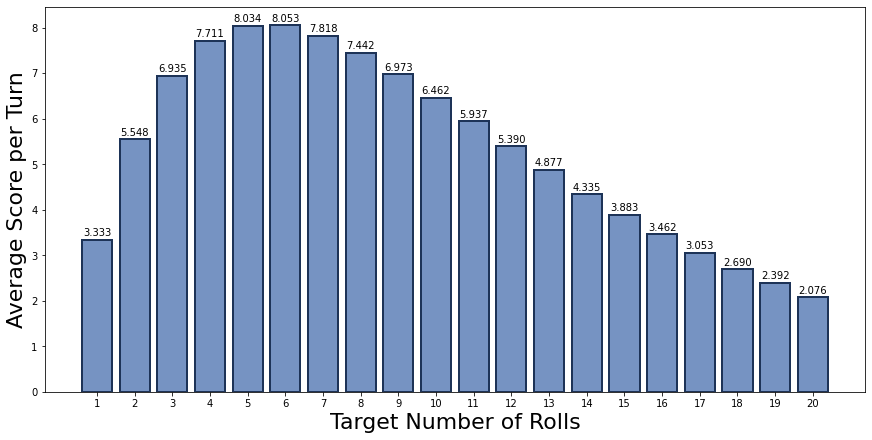

In [116]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

# returns a number between 1 and 6, inclusive
def roll_dice():
    return random.randint(1,6)

# returns the total score after rolling x amount of times
def take_turn(x):
    total = 0
    for i in range (0,x):
        roll = roll_dice()
        if roll == 1:
            return 0
        else:
            total += roll
    
    return total

# returns a list of scores from n number of turns rolling x amount of times each time
def play_game(n,x):
    scores = []
    for i in range(0,n):
        scores.append(take_turn(x))
    
    return scores

# returns the sum of all elements in scores
def avg_score(scores):
    return (sum(scores) / len(scores))


# returns a list of the average scores when targeting x rolls, where 1 <= x <= t
def all_avg_scores(t):
    avg_scores = []
    for i in range(1,t + 1):
        avg_scores.append(avg_score(play_game(1000000,i)))

    return avg_scores

fig, ax = plt.subplots(figsize=(12,6), layout="constrained")
plt.bar(
    [i for i in range(1,21)],
    all_avg_scores(20),
    color="#7693C2",
    edgecolor="#1D3357",
    linewidth=2
)
ax.bar_label(ax.containers[0], padding=2, fmt="%.3f")
ax.set_xlabel("Target Number of Rolls", fontsize=22)
ax.set_xticks(np.arange(1,21,1), [str(i) for i in range(1,21)])
ax.set_ylabel("Average Score per Turn", fontsize=22)


plt.show()


    


Analysis:

From the graph above, it is clear that a target number of rolls of 5 or 6 will yield the highest average score per turn, with 6 rolls slightly ahead. Intuitively, this makes sense since the chance of rolling a 1 on any given turn is 1/6. 

Strategy 2: aiming for x amount of points in a turn

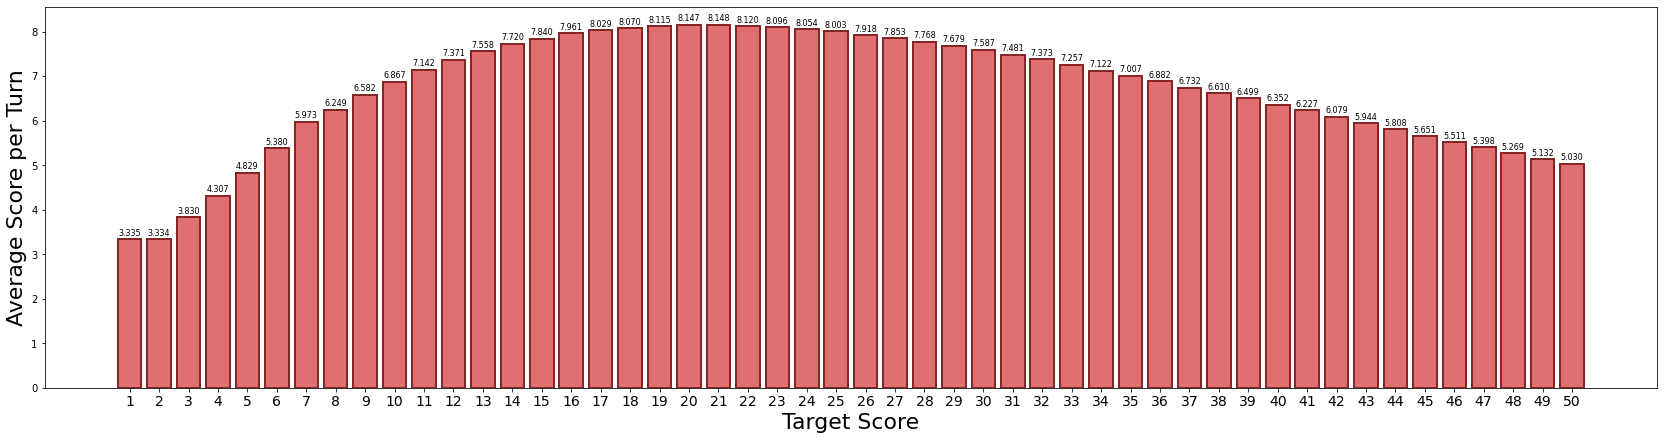

In [131]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

# returns a number between 1 and 6, inclusive
def roll_dice():
    return random.randint(1,6)

# returns the total score after rolling enough times to try to reach x points
def take_turn(x):
    total = 0
    while total < x:
        roll = roll_dice()
        if roll == 1:
            return 0
        else:
            total += roll

    return total

# returns a list of scores from n number of turns while aiming for x points each turn
def play_game(n,x):
    scores = []
    for i in range(0,n):
        scores.append(take_turn(x))
    
    return scores

# returns the sum of all elements in scores
def avg_score(scores):
    return (sum(scores) / len(scores))


# returns a list of the average scores when targeting x points, where 1 <= x <= t
def all_avg_scores(t):
    avg_scores = []
    for i in range(1,t + 1):
        avg_scores.append(avg_score(play_game(1000000,i)))

    return avg_scores

fig, ax = plt.subplots(figsize=(23,6), layout="constrained")
plt.bar(
    [i for i in range(1,51)],
    all_avg_scores(50),
    color="#E07070",
    edgecolor="#852525",
    linewidth=2
)
ax.bar_label(ax.containers[0], padding=2, fmt="%.3f", fontsize=8)
ax.set_xlabel("Target Score", fontsize=22)
ax.set_xticks(np.arange(1,51,1), [str(i) for i in range(1,51)], fontsize=14)
ax.set_ylabel("Average Score per Turn", fontsize=22)


plt.show()


Analysis:

From the graph above, targetting a score between 19 and 22 is optimal, with 21 being the best by a small margin. 

Conclusion:

Looking closely at the numbers, we find that the results from both strategies are closely linked. Since the expected value of a roll (excluding rolls of 1) is 4, we would expect that targeting 5-6 rolls per turn to be equal to targeting 20-24 points in a turn. Based on 1,000,000 simulation turns for each target number of rolls and target score, these numbers match up quite well. Furthermore, it can be concluded that targetting a score of 21 in each turn before stopping is the optimal strategy, which gives an expected score of 8.148 each turn. 